In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

print(tf.__version__)
# To make the results reproducible, set the random seed value.
tf.random.set_seed(22)

2023-06-30 16:46:20.952930: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-30 16:46:20.965594: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 16:46:21.094886: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 16:46:21.095860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 16:46:22.049353: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.12.0


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

In [3]:
dataset = pd.read_csv(url, names=column_names)

In [4]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         569 non-null    int64  
 1   diagnosis                  569 non-null    object 
 2   radius_mean                569 non-null    float64
 3   texture_mean               569 non-null    float64
 4   perimeter_mean             569 non-null    float64
 5   area_mean                  569 non-null    float64
 6   smoothness_mean            569 non-null    float64
 7   compactness_mean           569 non-null    float64
 8   concavity_mean             569 non-null    float64
 9   concave_poinits_mean       569 non-null    float64
 10  symmetry_mean              569 non-null    float64
 11  fractal_dimension_mean     569 non-null    float64
 12  radius_ste                 569 non-null    float64
 13  texture_ste                569 non-null    float64

In [6]:
# Splitting into training and testing data
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)

In [17]:
# The `id` column can be dropped since each row is unique
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In this dataset, we have measurements of what were collected per sample. The target is the "diagnosis" column which says if the tumor was malignant (M) or benign (B). 

In [18]:
y_train, y_test = y_train.map({"B": 0, "M": 1}), y_test.map({"B": 0, "M": 1})
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

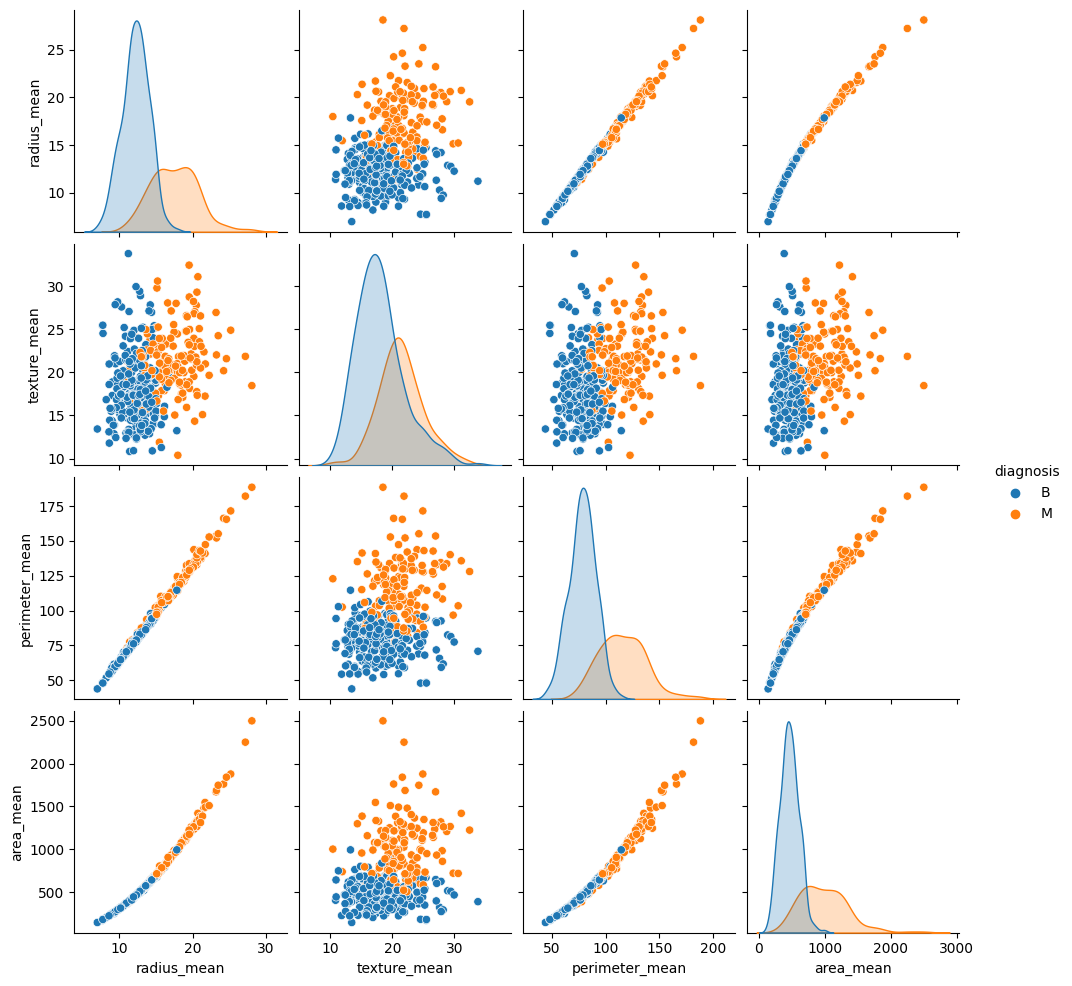

In [20]:
sns.pairplot(train_dataset.iloc[:, 1:6], hue = 'diagnosis', diag_kind='kde');

In [23]:
class Normalize(tf.Module): 

    def __init__(self, x): 

        self.mean = tf.Variable(tf.math.reduce_mean(x, axis = 0))
        self.std = tf.Variable(tf.math.reduce_std(x, axis = 0))

    def norm(self, x): 

        return (x - self.mean)/self.std
    
    def unnorm(self, x): 

        return (x * self.std) + self.mean
    
norm_x = Normalize(x_train)
x_train_norm, x_test_norm = norm_x.norm(x_train), norm_x.norm(x_test)

Since we are doing logistic regression, we are going to deal with the sigmoid function. Let's visualize it. 

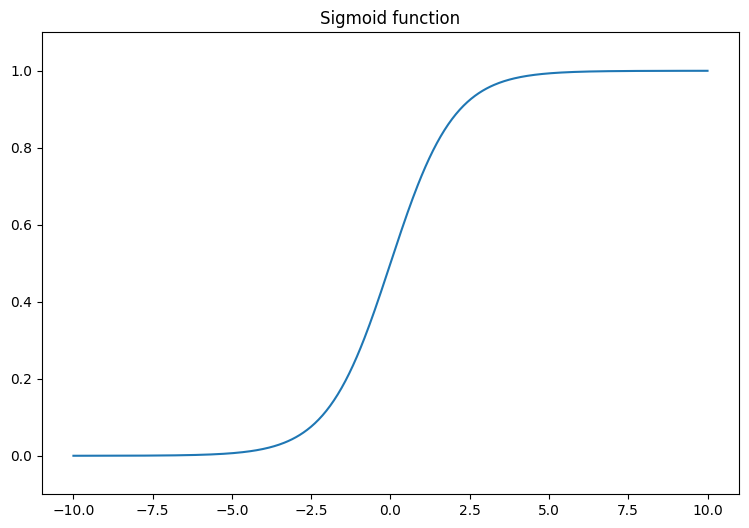

In [25]:
x = tf.linspace(-10, 10, 500)
x = tf.cast(x, tf.float32)
plt.plot(x, tf.math.sigmoid(x))
plt.ylim((-0.1,1.1))
plt.title("Sigmoid function");

In [26]:
def log_loss(y_pred, y): 

    ce = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = y_pred)
    return tf.reduce_mean(ce)

In [27]:

class LogisticRegression(tf.Module): 

    def __init__(self): 
        self.built = False 

    def __call__(self, x, train = True): 

        if not self.built: 
            rand_w = tf.random.uniform(shape = [x.shape[-1], 1], seed = 22)
            rand_b = tf.random.uniform(shape = [], seed = 22)
            self.w = tf.Variable(rand_w)
            self.b = tf.Variable(rand_b)

            self.built = True

        z = tf.add(tf.matmul(x, self.w), self.b)
        z = tf.squeeze(z, axis = 1)
        if train: 
            return z
        return tf.sigmoid(z)

In [34]:
log_reg = LogisticRegression()
y_pred = log_reg(x_train_norm[:5], train=False)
y_pred.numpy()

array([0.99960494, 0.9990026 , 0.06583275, 0.04254494, 0.31598273],
      dtype=float32)

In [35]:
def predict_class(y_pred, thresh=0.5): 

    return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y): 

    y_pred = tf.math.sigmoid(y_pred)
    y_pred_class = predict_class(y_pred)

    check_equal = tf.cast(y_pred_class == y, tf.float32)
    acc_val = tf.reduce_mean(check_equal)
    return acc_val

#### Setting up training of our model with batching

In [36]:
# Creating our batches of data
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)

# Setting up training parameters 
epochs = 200 
learning_rate = 0.01 
train_losses, test_losses = [], [] 
train_accs, test_accs = [], []

for epoch in range(epochs): 
    batch_losses_train, batch_accs_train = [], [] 
    batch_losses_test, batch_accs_test = [], [] 

    for x_batch, y_batch in train_dataset: 

        # We set up our gradient descent here
        with tf.GradientTape() as tape: 
            y_pred_batch = log_reg(x_batch)
            batch_loss = log_loss(y_pred_batch, y_batch)
        
        batch_acc = accuracy(y_pred_batch, y_batch)
        grads = tape.gradient(batch_loss, log_reg.variables)
        for g, v in zip(grads, log_reg.variables): 
            v.assign_sub(learning_rate * g)

        batch_losses_train.append(batch_loss)
        batch_accs_train.append(batch_acc)

    for x_batch, y_batch in test_dataset: 

        # We need to set up the batch loss and batch accuracy 
        y_pred_batch = log_reg(x_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)
        batch_loss = log_loss(y_pred_batch, y_batch)

        batch_losses_test.append(batch_loss)
        batch_accs_test.append(batch_acc)

    # Then we are going to set up the epoch level metrics 
    train_loss = tf.reduce_mean(batch_losses_train)
    train_acc = tf.reduce_mean(batch_accs_train)

    test_loss = tf.reduce_mean(batch_losses_test)
    test_acc = tf.reduce_mean(batch_accs_test)

    # Appending these values now
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    if epoch % 20 == 0: 
        print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")




2023-06-30 17:12:30.896111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [427,30]
	 [[{{node Placeholder/_0}}]]
2023-06-30 17:12:30.933163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [142]
	 [[{{node Placeholder/_1}}]]


Epoch: 0, Training log loss: 0.653
Epoch: 20, Training log loss: 0.461
Epoch: 40, Training log loss: 0.325
Epoch: 60, Training log loss: 0.238
Epoch: 80, Training log loss: 0.182
Epoch: 100, Training log loss: 0.140
Epoch: 120, Training log loss: 0.120
Epoch: 140, Training log loss: 0.113
Epoch: 160, Training log loss: 0.102
Epoch: 180, Training log loss: 0.093


### Performance evaluation

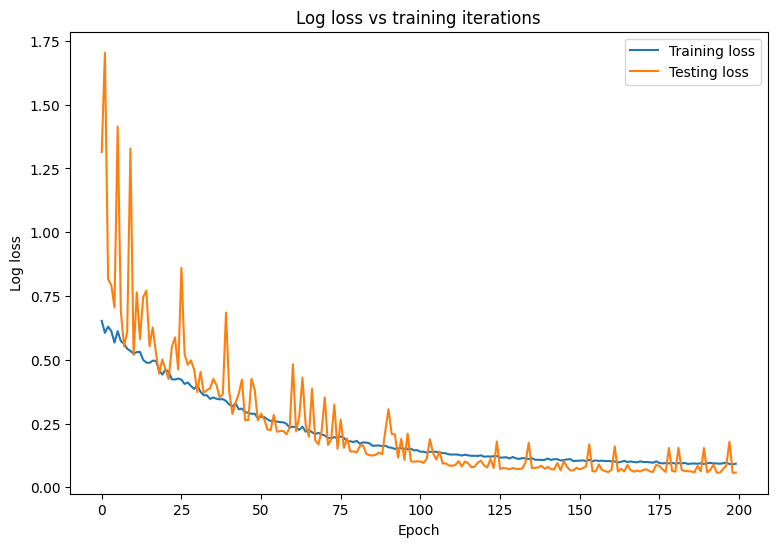

In [37]:
plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations");

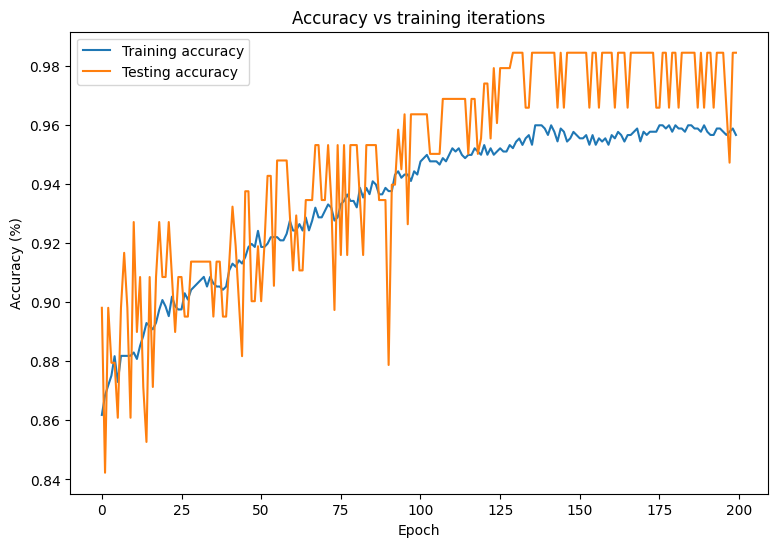

In [38]:
plt.plot(range(epochs), train_accs, label = "Training accuracy")
plt.plot(range(epochs), test_accs, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");